# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import torch
import torch

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu' 


# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [2]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

X, y = make_moons(1000, noise=0.1, random_state=42)
X[:5], y[:5]

(array([[-0.05146968,  0.44419863],
        [ 1.03201691, -0.41974116],
        [ 0.86789186, -0.25482711],
        [ 0.288851  , -0.44866862],
        [-0.83343911,  0.53505665]]),
 array([1, 1, 1, 1, 0]))

In [3]:
# Turn data into a DataFrame
import pandas as pd

# it already is a ndarray, why df? 

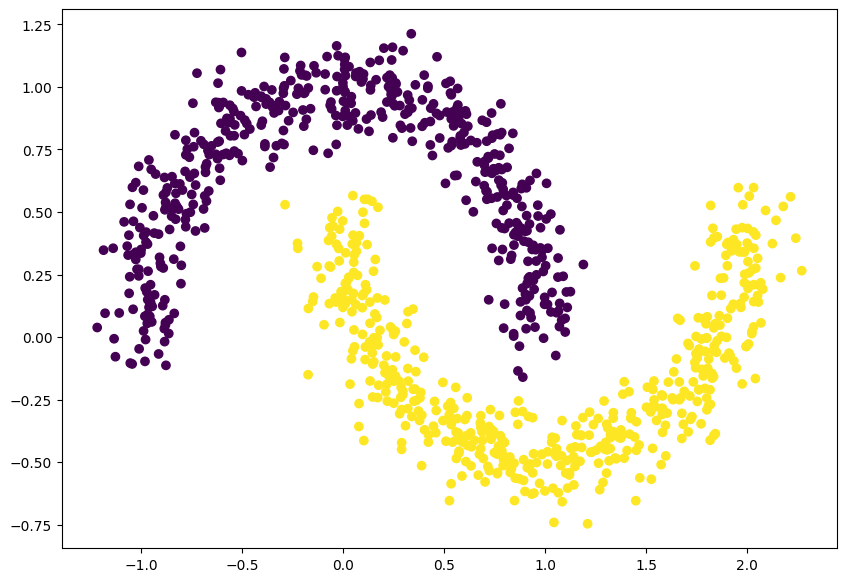

In [4]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
# Turn data into tensors of dtype float

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [6]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
        super().__init__()
        
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=1)
        )

    def forward(self, x):
        ## Your code here ##
        return self.linear_layer_stack(x)

# Instantiate the model
## Your code here ##
my_model = MoonModelV0()
my_model

MoonModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [7]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(my_model.parameters(), lr=0.15)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [8]:
# What's coming out of our model?
y_pred = my_model(X_test[0])

# logits (raw outputs of model)
print("Logits:")
## Your code here ##
print(y_pred)
# Prediction probabilities
print("Pred probs:")
## Your code here ##
y_pred_prob = torch.sigmoid(y_pred)
print(y_pred_prob)
# Prediction labels
print("Pred labels:")
## Your code here ##
print(1 if y_pred_prob.item() >= 0.5 else 0)

Logits:
tensor([-0.0589], grad_fn=<ViewBackward0>)
Pred probs:
tensor([0.4853], grad_fn=<SigmoidBackward0>)
Pred labels:
0


In [9]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [10]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000
my_model = my_model.to(device)

# Send data to the device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Loop through the data
for epoch in range(epochs):
    ### Training
  
    # 1. Forward pass (logits output)
    y_logits = my_model(X_train).squeeze()
    # Turn logits into prediction probabilities
    y_probs = torch.sigmoid(y_logits)

    # Turn prediction probabilities into prediction labels
    y_pred = torch.round(y_probs)

    # 2. Calculaute the loss
    loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

    # Calculate the accuracy
    acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

    # 3. Zero the gradients
    optimizer.zero_grad()
  

    # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
    loss.backward()
    # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
    optimizer.step()

    ### Testing
    my_model.eval() 
    with torch.inference_mode():
        # 1. Forward pass (to get the logits)
        y_test_pred = my_model(X_test).squeeze()
    
        # Turn the test logits into prediction labels

        # 2. Caculate the test loss/acc
        loss = loss_fn(y_test_pred, y_test)

        # Print out what's happening every 100 epochs
        if epoch % 100 == 0:
            print("Test loss: ", loss.item())

Test loss:  0.6806989908218384
Test loss:  0.28920623660087585
Test loss:  0.23251400887966156
Test loss:  0.21597345173358917
Test loss:  0.17626449465751648
Test loss:  0.11475485563278198
Test loss:  0.05820928141474724
Test loss:  0.035126328468322754
Test loss:  0.025359248742461205
Test loss:  0.02071056328713894


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [11]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

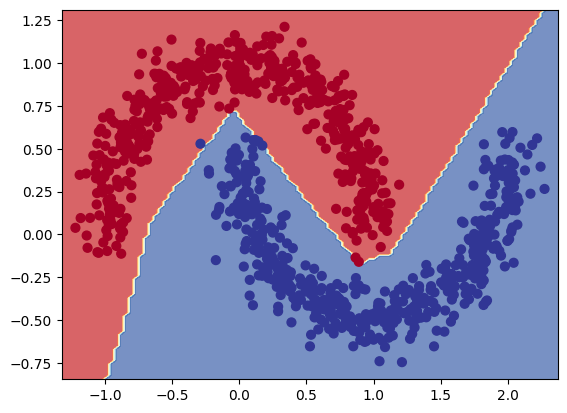

In [12]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(my_model, X, y)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

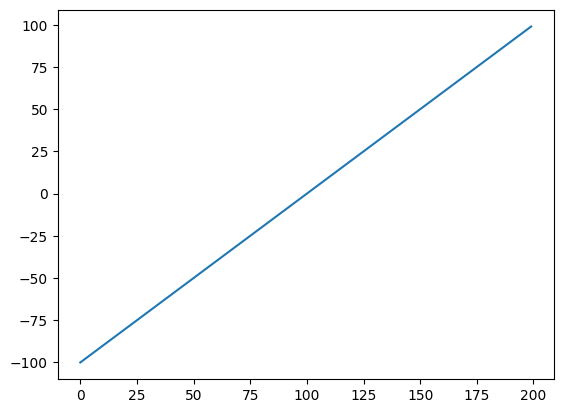

In [13]:
# Create a straight line tensor
tensor_A = torch.arange(-100, 100, 1)
plt.plot(tensor_A)

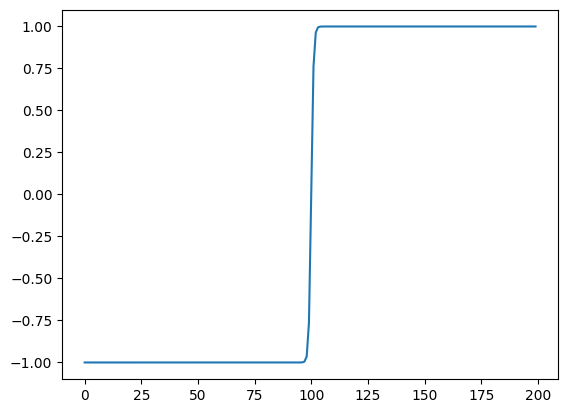

In [14]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(tensor_A))

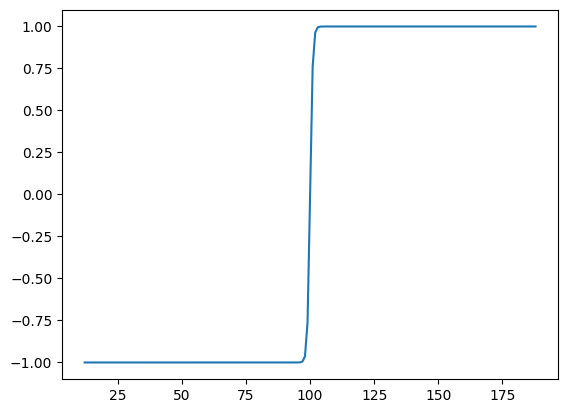

In [15]:
# Replicate torch.tanh() and plot it
def tanh(x):
    # Source - https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(tanh(tensor_A))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

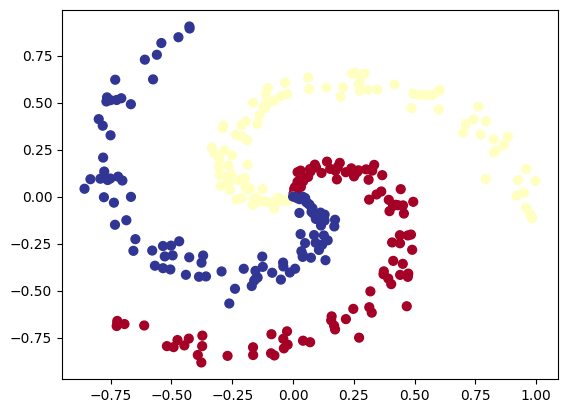

In [16]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [17]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [18]:
# Let's calculuate the accuracy for when we fit our model
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [19]:
# Prepare device agnostic code
# device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class SpiralModelV0(nn.Module):
    def __init__(self, in_f, out_f, hidden=8):
        super().__init__()
        self.layer1 = nn.Linear(in_features=in_f, out_features=hidden)
        self.layer2 = nn.Linear(in_features=hidden, out_features=hidden)
        self.layer3 = nn.Linear(in_features=hidden, out_features=out_f)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


# Instantiate model and send it to device
my_model = SpiralModelV0(2, K, 8).to(device)
my_model

SpiralModelV0(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=3, bias=True)
  (relu): ReLU()
)

In [20]:
# Setup data to be device agnostic
X = X.to(device)
y = y.to(device)
# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##
print(my_model(X[:10]))

print("Pred probs:")
## Your code here ##
print(torch.softmax(my_model(X[:10]), dim=1))

print("Pred labels:")
## Your code here ##
print(torch.argmax(my_model(X[:10]), dim=1))

Logits:
tensor([[-0.0711, -0.3803, -0.2443],
        [-0.0713, -0.3809, -0.2453],
        [-0.0718, -0.3820, -0.2465],
        [-0.0726, -0.3834, -0.2478],
        [-0.0721, -0.3832, -0.2483],
        [-0.0726, -0.3842, -0.2495],
        [-0.0746, -0.3872, -0.2516],
        [-0.0747, -0.3876, -0.2525],
        [-0.0739, -0.3871, -0.2529],
        [-0.0759, -0.3900, -0.2550]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
Pred probs:
tensor([[0.3883, 0.2851, 0.3266],
        [0.3885, 0.2850, 0.3265],
        [0.3886, 0.2850, 0.3264],
        [0.3888, 0.2849, 0.3263],
        [0.3889, 0.2850, 0.3261],
        [0.3891, 0.2849, 0.3260],
        [0.3892, 0.2847, 0.3261],
        [0.3894, 0.2847, 0.3259],
        [0.3895, 0.2848, 0.3257],
        [0.3896, 0.2846, 0.3257]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


In [21]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(my_model.parameters(), lr=0.1)

In [22]:
# Build a training loop for the model
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
# Loop over data
epochs = 5000

for epoch in range(epochs):
    my_model.train()
    y_logits = my_model(X_train)
    loss = loss_fn(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ### Testing
    my_model.eval() 
    with torch.inference_mode():
        # 1. Forward pass (to get the logits)
        y_test_pred = my_model(X_test).squeeze()
    
        # Turn the test logits into prediction labels

        # 2. Caculate the test loss/acc
        loss = loss_fn(y_test_pred, y_test)

        # Print out what's happening every 100 epochs
        if epoch % 100 == 0:
            print("Test loss: ", loss.item())
  

Test loss:  1.1079978942871094
Test loss:  1.0217934846878052
Test loss:  0.8976434469223022
Test loss:  0.7935218811035156
Test loss:  0.7309228777885437
Test loss:  0.6808145046234131
Test loss:  0.6314540505409241
Test loss:  0.583326518535614
Test loss:  0.533012866973877
Test loss:  0.4769646227359772
Test loss:  0.41595301032066345
Test loss:  0.36327263712882996
Test loss:  0.32278773188591003
Test loss:  0.31098970770835876
Test loss:  0.2713717222213745
Test loss:  0.2641816735267639
Test loss:  0.23609167337417603
Test loss:  0.22974461317062378
Test loss:  0.2115185558795929
Test loss:  0.19855669140815735
Test loss:  0.199166402220726
Test loss:  0.2056421935558319
Test loss:  0.2048182487487793
Test loss:  0.19859179854393005
Test loss:  0.19056564569473267
Test loss:  0.1807122379541397
Test loss:  0.17009881138801575
Test loss:  0.16256995499134064
Test loss:  0.15515919029712677
Test loss:  0.1480163186788559
Test loss:  0.14275260269641876
Test loss:  0.137285321950912

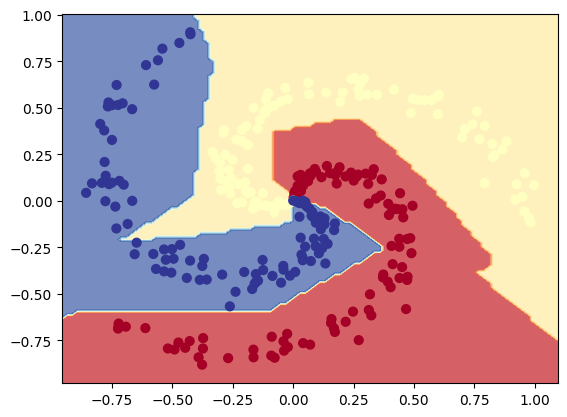

In [23]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(my_model, X, y)